In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
from sklearn.linear_model import LogisticRegressionCV

In [83]:
data.columns


Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

**Most of the features in the data set are binary in nature and few are already following a
defined scale. From the above features, it is observed some of the features have lesser
correlation values to each other. PhysActivity, Fruits, and Veggies have lower values.
GenHlth, MentHlth, and DiffWalk have a higher impact. The images on the next page give us
the uniqueness of the columns. We also observe the data is balanced.**

In [3]:
data = pd.read_csv('./diabetes_data.csv',sep=',')
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(70692, 18)

In [5]:
data.Diabetes.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [6]:
unique_values = [[i,len(data[i].unique())] for i in data.columns]
pd.DataFrame(unique_values, columns=["feature","unique values"]).set_index("feature")

,unique values
feature,
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


check if there is missing data

In [7]:
data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [8]:
feature_data = data.columns[:-1]

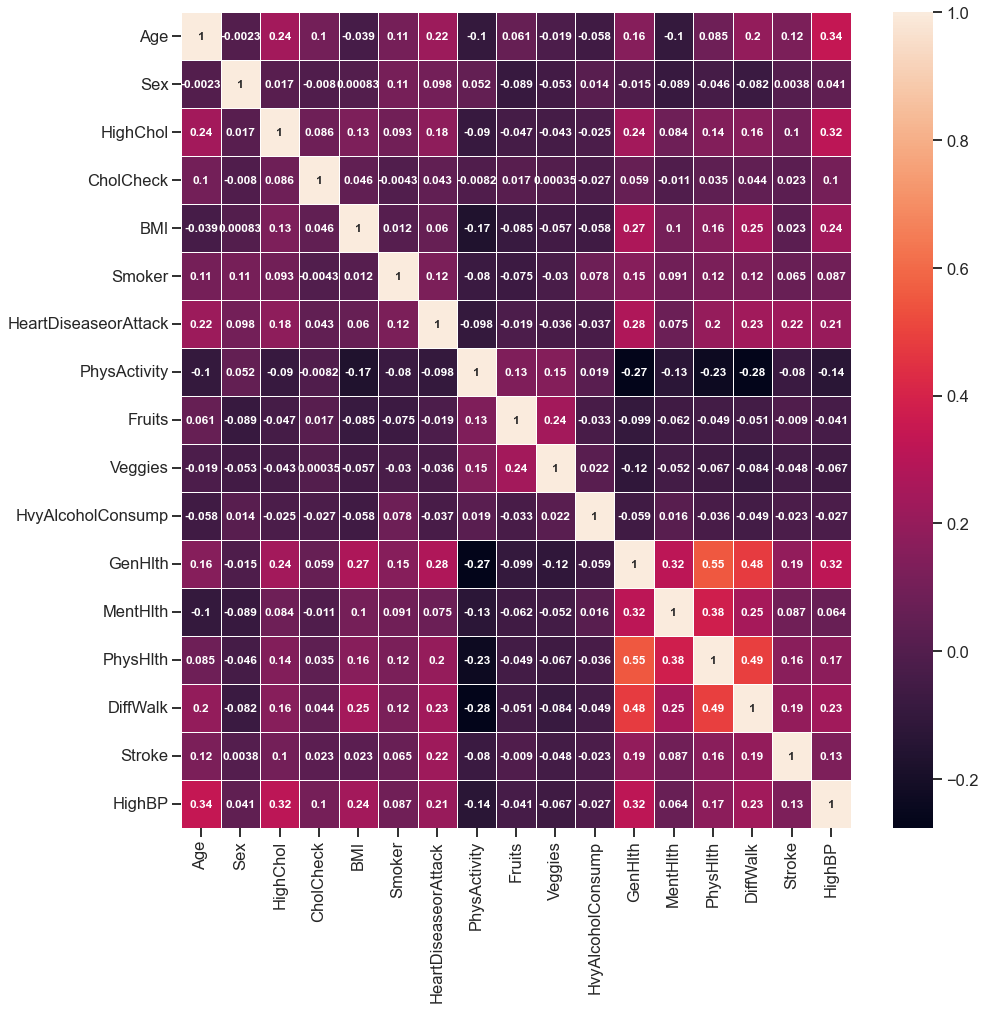

In [89]:
plt.figure(figsize = (15, 15))
heatmap = sns.heatmap(data[feature_data].corr(), annot =True , linewidth=0.7,annot_kws={"size": 12, "weight": "bold"})
fig = heatmap.get_figure()
fig.savefig("heatmap_corr.png") 

In [10]:
feature_data

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')

In [11]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_index, test_index = next(strat_split.split(data[feature_data],data.Diabetes))

xtrain = data.loc[train_index, feature_data]
ytrain = data.loc[train_index, 'Diabetes']

xtest = data.loc[test_index, feature_data]
ytest = data.loc[test_index, 'Diabetes']

In [12]:
ytrain.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: Diabetes, dtype: float64

In [13]:
ytest.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: Diabetes, dtype: float64

# Logistic regression

**The data is split using stratified split function so that the balance is maintained in the data.
The hyperparameters used Cs=10, and Cv=4, with the regularization of L2. which yielded a
model with below accuracy scores.**

In [90]:
LR = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(xtrain, ytrain)


In [91]:
LR.coef_

array([[ 0.14881818,  0.22000734,  0.5797188 ,  1.08754398,  0.07317039,
         0.01335202,  0.28540396, -0.05003094, -0.03958948, -0.10674337,
        -0.76177726,  0.61018017, -0.00349231, -0.0076928 ,  0.16433415,
         0.22605657,  0.75676491]])

In [92]:
ypred = LR.predict(xtest)

## score

In [93]:
precision, recall, fscore, _ = score(ytest, ypred, average='weighted')
accuracy = accuracy_score(ytest, ypred)
cm= confusion_matrix(ytest, ypred)

In [95]:
print("precision =",precision)
print("recall =",recall)
print("fscore =",fscore)
print("accuracy_score =",accuracy)

precision = 0.7476089337500991
recall = 0.7470294228592984
fscore = 0.7468813213462355
accuracy_score = 0.7470294228592984


In [96]:
train_test_full_error = pd.concat([measure_error(ytest, ypred, 'test')],axis=1)
train_test_full_error

,test
accuracy,0.747029
precision,0.735630
recall,0.771218
f1,0.753004


Text(0.5, 40.5, 'Ground Truth')

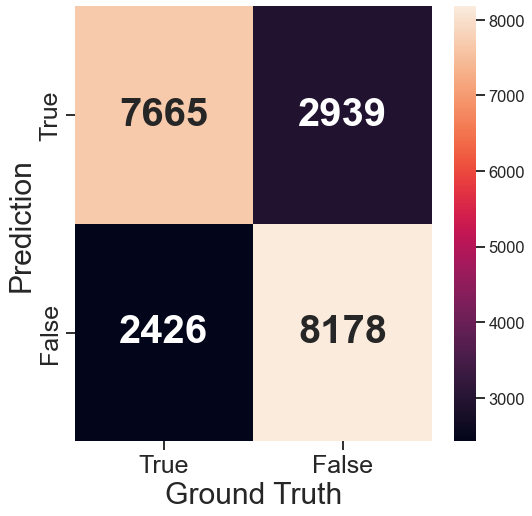

In [97]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

# KNN Clasification

**For K nearest neighbor model we need to select the optimum K value. For obtaining the
optimum value for k I trained the model with different values of k and obtained the curve
for the error rate plotted against K used.**

In [30]:
max_k = 40
f1_scores = list()
error_rates = list()

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(xtrain, ytrain)
    
    ypred = knn.predict(xtest)
    f1 = f1_score(ypred, ytest)
    f1_scores.append((k, round(f1_score(ytest, ypred), 4)))
    error = 1-round(accuracy_score(ytest, ypred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

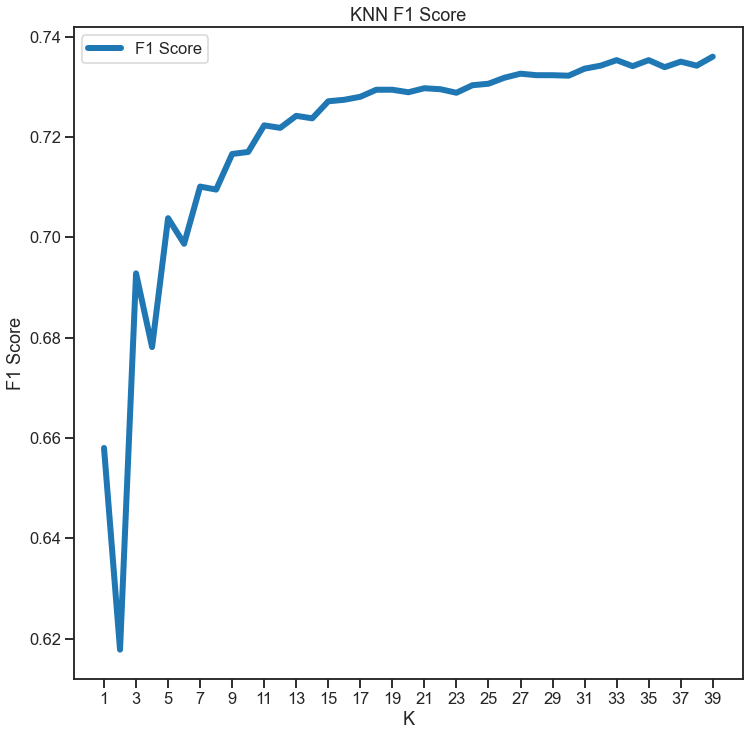

In [31]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

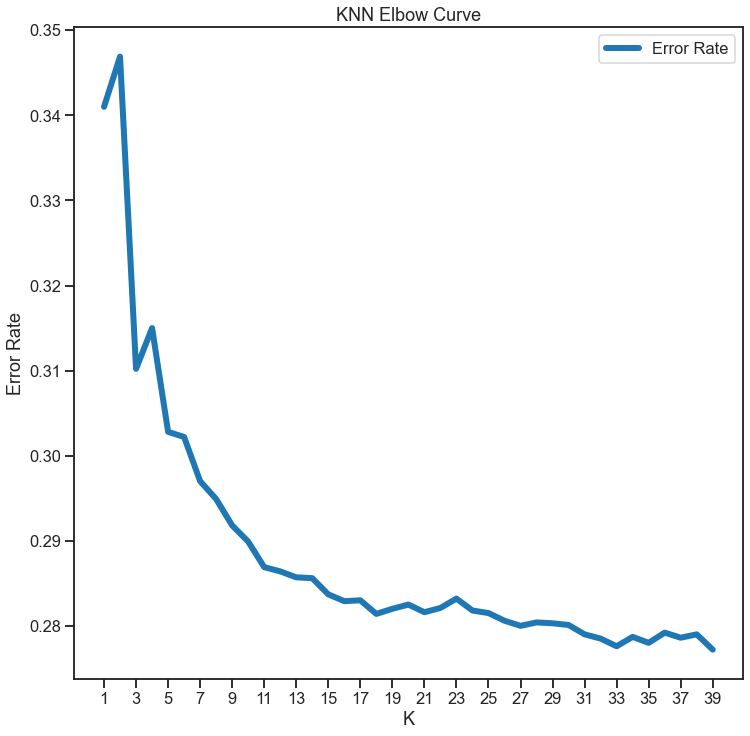

In [32]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [98]:
knn = KNeighborsClassifier(n_neighbors=39, weights='distance')
knn = knn.fit(xtrain, ytrain)

In [99]:
ypred = knn.predict(xtest)
f1 = f1_score(ypred, ytest)

In [100]:
precision, recall, fscore, _ = score(ytest, ypred, average='weighted')
accuracy = accuracy_score(ytest, ypred)
cm= confusion_matrix(ytest, ypred)

In [101]:
print("precision =",precision)
print("recall =",recall)
print("fscore =",fscore)
print("accuracy_score =",round(accuracy,4))

precision = 0.7250725233378916
recall = 0.722840437570728
fscore = 0.722151569024034
accuracy_score = 0.7228


In [102]:
train_test_full_error = pd.concat([measure_error(ytest, ypred, 'test')],axis=1)
train_test_full_error

,test
accuracy,0.722840
precision,0.702659
recall,0.772633
f1,0.735986


Text(0.5, 40.5, 'Ground Truth')

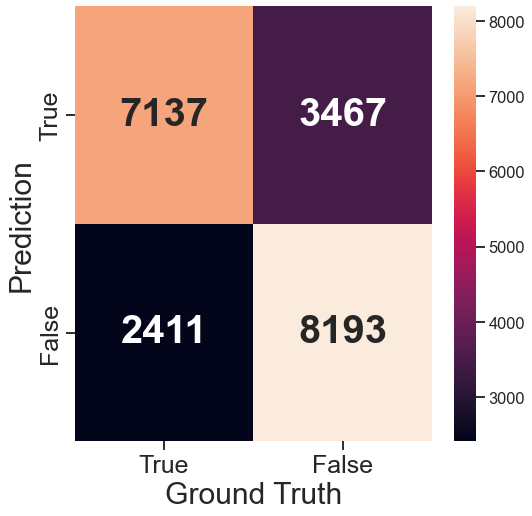

In [103]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

# Decision tree

**For identifying the optimal hyperparameters I have used the grid search method for the
decision tree, which gave the optimal depth of the tree as 7**

In [104]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(xtrain, ytrain)



param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(xtrain, ytrain)

In [63]:
print(GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth)

253 7


In [64]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [107]:
y_train_pred = GR.predict(xtrain)
y_test_pred = GR.predict(xtest)

train_test_full_error = pd.concat([
                              measure_error(ytest, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.737929
precision,0.706296
recall,0.814598
f1,0.756591


Text(0.5, 40.5, 'Ground Truth')

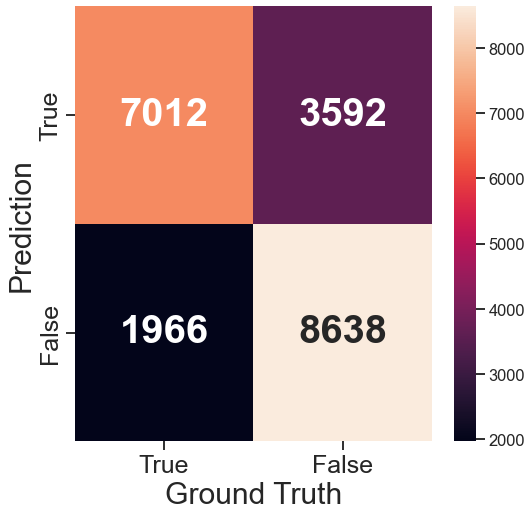

In [108]:
cm= confusion_matrix(ytest, y_test_pred)
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

# Random forest (bagging)

**As the decision tree model has lesser accuracy compared to previous models we needed to
verify if the random forest model can improve these scores. Here we select the optimum
hyperparameters by selecting the model with the least out-of-bagging error. We select how
many estimator trees to build before voting and calculate the out-of-bagging error to that
model. As shown below we observe that after 60 estimators we don't get much
improvement in the scores. Hence we will consider n_estimators to be 60 for our data.**

In [74]:
RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True,n_jobs=-1)

oob_list = list()

for n_trees in [20, 30, 40, 50, 60, 70, 100, 150, 200]:
    
    
    RF.set_params(n_estimators=n_trees)
    RF.fit(xtrain, ytrain)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\nutan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nutan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


,oob
n_trees,
20.0,0.297066
30.0,0.287164
40.0,0.283001
50.0,0.281687
60.0,0.279606
70.0,0.276938
100.0,0.275382
150.0,0.275422
200.0,0.274351


In [76]:

RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True,n_jobs=-1)
rf_model = RF.set_params(n_estimators=60)
rf_model.fit(xtrain, ytrain)
ypred = rf_model.predict(xtest)

In [81]:
train_test_full_error = pd.concat([measure_error(ytest, ypred, 'test')],axis=1)
train_test_full_error

,test
accuracy,0.720907
precision,0.706624
recall,0.755470
f1,0.730231


Text(0.5, 40.5, 'Ground Truth')

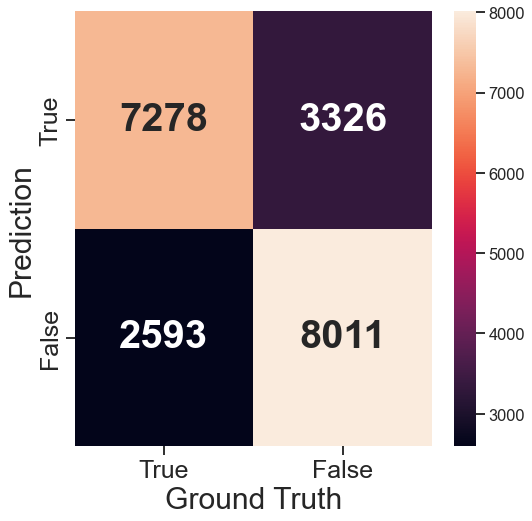

In [82]:
cm= confusion_matrix(ytest, ypred)
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

# Conclusion

From the comparison we observe that the Logistic regression model has a better prediction
in both diabetes positive and negative cases. Other models tend to have higher false
positives. In the decision tree even if the model predicts the diabetes negative data points
more accurately it fails to identify the positive data points. Overall the trend is that all the
models have a higher chance of false positives than false negatives. The model is skewed
towards identifying people as positive even if they are not.

From the accuracy score we find the decision tree has a higher score than the logistic
regression yet by a factor of thousands, yet the accuracy of the model is less compared to
the logistic regression, by a factor of hundreds. Here the main contributing factor for a better f1 score is the higher recall value of the decision tree, yet it has lower precision by a
factor of three hundred compared to logistic regression. Hence even if the decision tree has
a better f1 score and considering the trend that data tends to fit the model skewed towards
false positive, I conclude the logistic regression model has performed better overall.
